In [ ]:
'''
Name   : Rupesh garsondiya
github : @Rupeshgarsondiya
Topic  : Dropout in neural network in deep-learning (DL)
'''

'\nName   : Rupesh garsondiya\ngithub : @Rupeshgarsondiya\nTopic  : Dropout in neural network in deep-learning (DL)\n'

# Dropout in neural network

- Using this technique, we reduce overfitting in the neural network.
- In this technique, we drop some nodes in the hidden layer.
- Let's get some intuition by looking at the image.

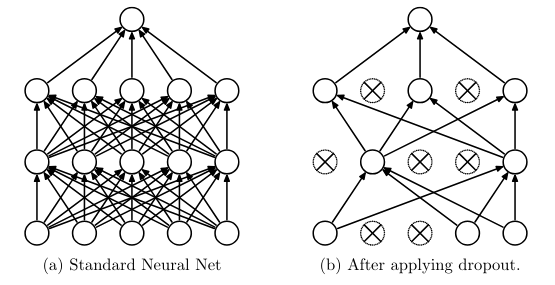

**Refrance : Original reaserch paper**

**Link : https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf**



Working: If we train the model for 10 epochs, it means we train 10 different neural networks on the same data. The node dropout is completely random, allowing our deep learning model to generalize better.

**Important point :**
- Here, the hyperparameter is p. For example, if p = 0.5, it means we drop 50% of the nodes in the hidden layer.
- p is called the dropout ratio.
- We apply dropout only during the training phase; it is not applied during the testing or prediction phase.
- During prediction, the weight value is adjusted as w(1−p), where:
  - w is the training weight.
  - pp is the dropout ratio.

**Remember :**
1. if p = high model----> underfit
2. if p = low  model----> overfit
3. Always apply dropout first in the last hidden layer; it’s a good starting point.
4. For Convolutional Neural Networks (CNNs), p is typically 40%–50%.
5. For Recurrent Neural Networks (RNNs), p is typically 20%–30%.
6. For Artificial Neural Networks (ANNs), p ranges from 10%–50%.

**Drawbacks :**
1. Training becomes slower.
2. The loss function changes with each epoch because the neural network architecture changes randomly due to dropout. This results in different gradients being calculated in every epoch, making the optimization process more challenging. Additionally, debugging the architecture becomes more difficult.

**This is the complete overview. If you want to dive deeper and understand the mathematics behind it, you must read the research paper I mentioned link above.**

**Refrance : Campus X Deep-learning By Nitish sir**

**Link :https://www.youtube.com/watch?v=tgIx04ML7-Y&list=PLKnIA16_RmvYuZauWaPlRTC54KxSNLtNn&index=25**


In [52]:
# import libary
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

(150, 4)
(150,)


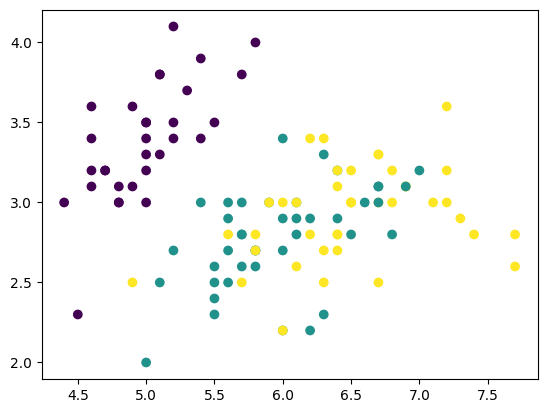

In [48]:
# load the data
X,y = load_iris(return_X_y=True)

print(X.shape)
print(y.shape)

# Split train and test data

x_train,x_test,y_train,y_test = train_test_split(X[:,[0,1]],y)

#plot the data

plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show()



# With out Dropout

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_138 (Dense)                    │ (None, 100)                 │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_139 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_140 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_141 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_142 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_143 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_144 (Dense)                    │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,103 (199.62 KB)

 Trainable params: 51,103 (199.62 KB)

 Non-trainable params: 0 (0.00 B)

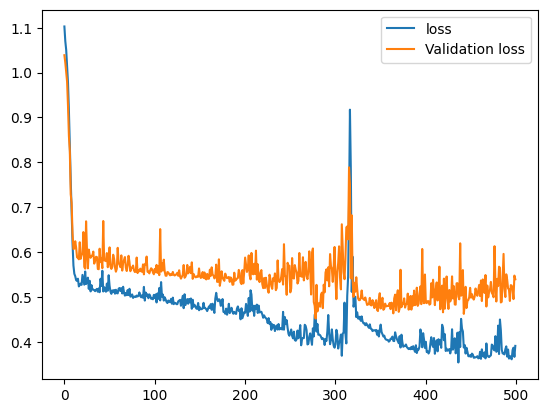

In [63]:
from re import VERBOSE
# design the neural network

model = Sequential()
model.add(Dense(activation ='relu',units=100,input_dim=x_train.shape[1]))
model.add(Dense(activation ='relu',units=100))
model.add(Dense(activation ='relu',units=100))
model.add(Dense(activation ='relu',units=100))
model.add(Dense(activation ='relu',units=100))
model.add(Dense(activation ='relu',units=100))
model.add(Dense(activation ='softmax',units=3))

# model compile
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

# Get model summary

model.summary()

# Fit the model

history = model.fit(x_train,y_train,epochs=500,validation_split=0.2,verbose =0)

# plot graph accuracy and loss
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.legend()
plt.show()

# With Dropout layer

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_159 (Dense)                    │ (None, 100)                 │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_160 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_161 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_162 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_163 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_164 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_165 (Dense)                    │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,103 (199.62 KB)

 Trainable params: 51,103 (199.62 KB)

 Non-trainable params: 0 (0.00 B)

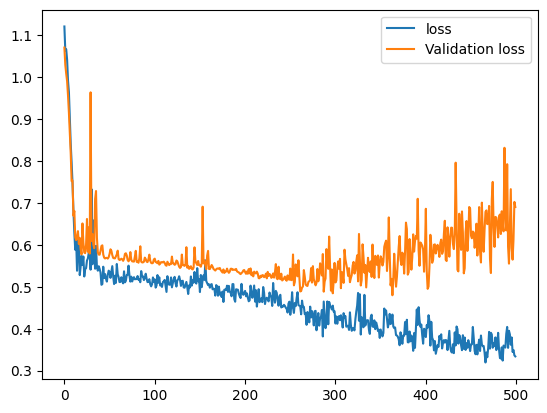

' Note : Here, we clearly see that after applying dropout in the last hidden layer, there is a change in validation loss, and the validation loss decreases. The first dropout layer is applied to the last\n  hidden layer, and then another dropout layer is applied to the middle layer.'

In [67]:
from re import VERBOSE
# design the neural network

model1 = Sequential()
model1.add(Dense(activation ='relu',units=100,input_dim=x_train.shape[1]))
model1.add(Dense(activation ='relu',units=100))
model1.add(Dense(activation ='relu',units=100))
model1.add(Dense(activation ='relu',units=100))
model1.add(Dense(activation ='relu',units=100))
model1.add(Dense(activation ='relu',units=100))
model1.add(Dropout(rate=0.4))
model1.add(Dense(activation ='softmax',units=3))

# model compile
model1.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

# Get model summary

model1.summary()

# Fit the model

history1 = model1.fit(x_train,y_train,epochs=500,validation_split=0.2,verbose =0)

# plot graph accuracy and loss
plt.plot(history1.history['loss'],label='loss')
plt.plot(history1.history['val_loss'],label='Validation loss')
plt.legend()
plt.show()
''' Note : Here, we clearly see that after applying dropout in the last hidden layer, there is a change in validation loss, and the validation loss decreases. The first dropout layer is applied to the last
  hidden layer, and then another dropout layer is applied to the middle layer.'''

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_152 (Dense)                    │ (None, 100)                 │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_153 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_154 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_155 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_156 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_157 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_158 (Dense)                    │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,103 (199.62 KB)

 Trainable params: 51,103 (199.62 KB)

 Non-trainable params: 0 (0.00 B)

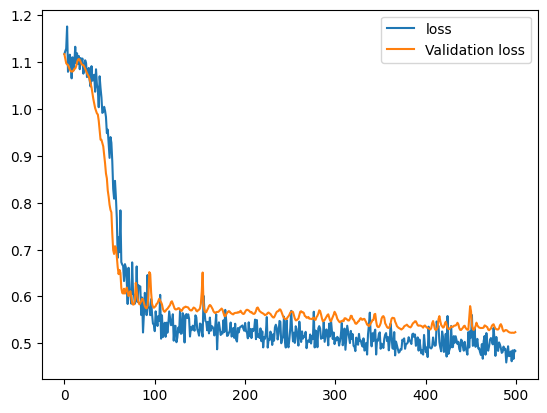

In [65]:
model2 = Sequential()
model2.add(Dense(activation ='relu',units=100,input_dim=x_train.shape[1]))
model2.add(Dropout(rate=0.4))
model2.add(Dense(activation ='relu',units=100))
model2.add(Dropout(rate=0.4))
model2.add(Dense(activation ='relu',units=100))
model2.add(Dense(activation ='relu',units=100))
model2.add(Dropout(rate=0.4))
model2.add(Dense(activation ='relu',units=100))
model2.add(Dropout(rate=0.4))
model2.add(Dense(activation ='relu',units=100))
model2.add(Dropout(rate=0.4))
model2.add(Dense(activation ='softmax',units=3))

# model compile
model2.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

# Get model summary

model2.summary()

# Fit the model

history2 = model2.fit(x_train,y_train,epochs=500,validation_split=0.2,verbose =0)

# plot graph accuracy and loss
plt.plot(history2.history['loss'],label='loss')
plt.plot(history2.history['val_loss'],label='Validation loss')
plt.legend()
plt.show()

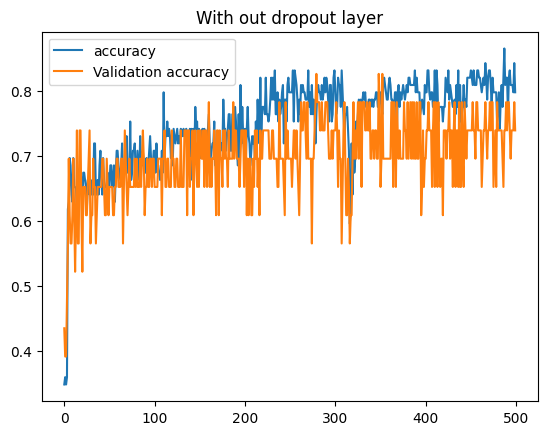

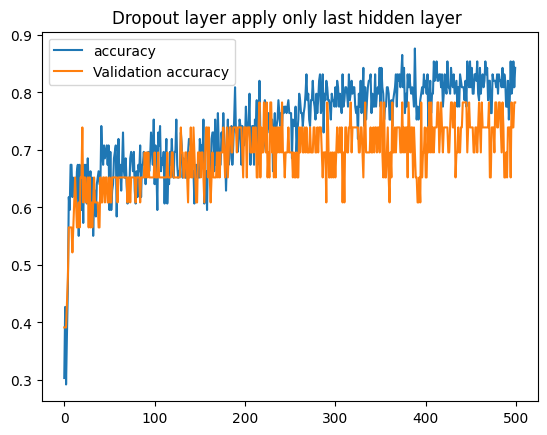

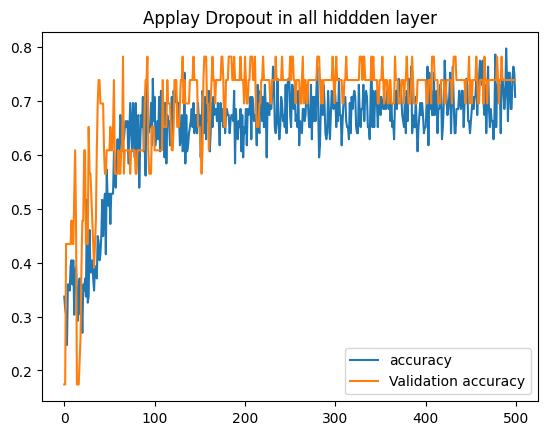

In [68]:
#plot accuracy graph

plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.legend()
plt.title('With out dropout layer')
plt.show()

print()

plt.plot(history1.history['accuracy'],label='accuracy')
plt.plot(history1.history['val_accuracy'],label='Validation accuracy')
plt.legend()
plt.title('Dropout layer apply only last hidden layer ')
plt.show()

print()

plt.plot(history2.history['accuracy'],label='accuracy')
plt.plot(history2.history['val_accuracy'],label='Validation accuracy')
plt.legend()
plt.title('Applay Dropout in all hiddden layer')
plt.show()


# Here, we clearly see that when we apply dropout, our accuracy increases, and our loss decreases.